In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import skimage

In [ ]:
def root_mean_square_error(x_interp, y_interp, function):
    return np.sqrt(1/len(x_interp) * np.sum(np.power((function(x_interp) - y_interp), 2)))

def mean_square_error(x_interp, y_interp, function):
    return np.multiply(1/len(x_interp), np.sum((function(x_interp) - y_interp)**2))

def mean_square_error_with_datapoints(x_interp, y_interp, y_datapoints):
    return np.multiply(1/x_interp, np.sum((y_datapoints[:len(y_datapoints)] - y_interp[:len(y_datapoints)])**2))

def mean_square_error_2D(original_data, tested_data):
    rows, cols = np.shape(tested_data)
    sum = 0
    for row in range(rows):
      sum += mean_square_error_with_datapoints(cols, original_data[row], tested_data[row])
    return sum

In [ ]:
def f1(x):
    return np.sin(x)

def f2(x):
    return np.sin(np.power(x, -1))

def f3(x):
    return np.sign(np.sin(8 * x))

In [ ]:
def kernel_interpolate(x_input, y_input, x_interp, kernel):
    y_interp = np.zeros_like(x_interp)
    kernel_width = np.median(np.diff(x_input))
    for i, x in enumerate(x_interp):
        weights = kernel(np.divide((x - x_input), kernel_width))
        y_interp[i] = np.divide(np.sum(weights * y_input), np.sum(weights))
    return y_interp

def kernel_interpolate_with_variable_widths(x_input, y_input, x_interp, kernel):
    y_interp = np.zeros_like(x_interp)
    kernel_widths = []

    for i in range(len(x_input) - 1):
      kernel_widths.append(np.abs(x_input[i] -  x_input[i + 1]))

    for j, x in enumerate(x_interp):
        index = 0
        if np.abs(x_interp[j] -  kernel_widths[index]) > np.abs(x_interp[j] - kernel_widths[index + 1]):
            index += 1
        weights = kernel(np.divide((x - x_input), kernel_widths[index]))
        y_interp[j] = np.divide(np.sum(weights * y_input), np.sum(weights))
    return y_interp



def interpolate_2D(data, interpolating_function, point_multiplier, kernel):
    rows, cols = data.shape
    row_interpolated = np.zeros((rows, cols * point_multiplier))

    for i in range(rows):
      x_input = np.arange(cols)
      y_input = data[i, :]
      x_interp = np.linspace(0, cols - 1, cols * point_multiplier)
      row_interpolated[i, :] = interpolating_function(x_input, y_input, x_interp, kernel)

    result = np.zeros((rows * point_multiplier, cols * point_multiplier))
    for j in range(cols * point_multiplier):
      x_input = np.arange(rows)
      y_input = row_interpolated[:, j]
      x_interp = np.linspace(0, rows - 1, rows * point_multiplier)
      result[:, j] = interpolating_function(x_input, y_input, x_interp, kernel)
    return result

def sample_and_hold(t):
    return np.where((t >= 0) & (t < 1), 1, 0)

def nearest_neighbour(t):
    return np.where((t >= -1/2) & (t < 1/2), 1, 0)

def linear(t):
    return np.where((t >= - 1) & (t < 1), 1 - abs(t), 0)

def sinc(t):
  t_safe = np.where(t == 0, 1e-20, t)
  return np.where(t == 0, 1, np.divide(np.sin(np.pi * t_safe), t_safe))

def hamming_sinc(t):
    t_safe = np.where(t == 0, 1e-20, t)
    return np.where(t == 0, 1, (np.divide(np.sin(np.pi * t_safe), t_safe) * (0.54 - 0.46 * np.cos(np.pi * 2 * t_safe))))

def cubic_spline(t):
    return np.where(
        (t >= -2) & (t <= 2),
            np.where(
                (t >= 0) & (t <= 1), (3/2 * t **3) - (5/2 * t **2) + 1,
                      np.where(
                          (t >= 1) & (t <= 2), (-1 * 1/2 * t ** 3) + (5/2 * t ** 2) - (4 * t) + 2,
                              np.where(
                                (t <= 0) & (t >= -1), (3/2 * (-t) **3) - (5/2 * (-t) **2) + 1,
                                     np.where(
                                          (t <= -1) & (t >= -2), (-1 * 1/2 * (-t) ** 3) + (5/2 * (-t) ** 2) - (4 * (-t)) + 2,
                                          0
                                        )
                                  )
                            )
                    ),
                  0
            )
def gaussian(t):
    return np.exp(-t**2)

In [309]:
density = 100
x = np.linspace(-2 * np.pi, 2 * np.pi, density)
y = f1(x)

x_normal = np.random.normal(0, np.pi, 100)
x_normal = [x for x in x_normal if (x > - 2 * np.pi) and (x < 2 * np.pi)]
x_normal = np.sort(x_normal)
y_normal = f1(x_normal)

x_interp2 = np.linspace(np.min(x), np.max(x), density * 2)
x_interp4 = np.linspace(np.min(x), np.max(x), density * 4)
x_interp10 = np.linspace(np.min(x), np.max(x), density * 10)
x_interp16 = np.linspace(np.min(x), np.max(x), density * 16)
x_interp100 = np.linspace(np.min(x), np.max(x), density * 100)
x_interp1000 = np.linspace(np.min(x), np.max(x), density * 1000)
x_interp10000 = np.linspace(np.min(x), np.max(x), density * 10000)

Jak można zauważyć wpływ rozmieszczenia punktów ma duże znaczenie wobec dokładności. Dokładność jest niższa, kiedy trafi się zbyt wysoki odstęp funkcja może nie być ciągła.

variable kernel width, normal, gaussian MSE:  0.020994452528747737


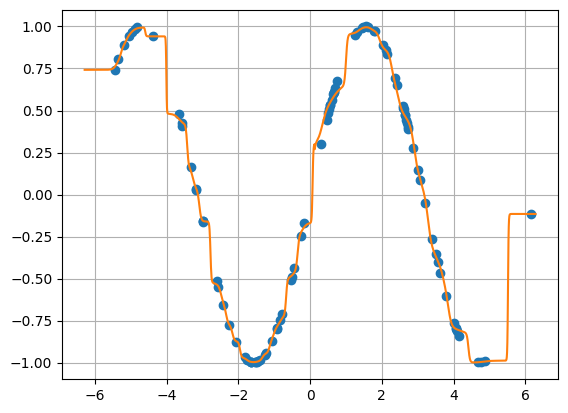

In [310]:
plt.plot(x_normal, y_normal, 'o', label = "normal data points")
plt.plot(x_interp16, kernel_interpolate_with_variable_widths(x_normal, y_normal, x_interp16, gaussian), label="variable kernel widht, normal, gaussian")
print("variable kernel width, normal, gaussian MSE: ", mean_square_error(x_interp16, kernel_interpolate_with_variable_widths(x_normal, y_normal, x_interp16, gaussian), f1))

plt.grid()
plt.show()

Kernel z stałą wartością szerokości poszczególnych punktów wejściowych wykazywał większy błąd. Było to spowodowanie nieregularnością w danych. Nastomiast dowodzi to, że możemy wykonywać interpolację na nieidealnych danych. Jednakże prawdą jest, że dane są kluczem do trafnej interpolacji.

fixed kernel width, normal, gaussian MSE:  0.021325221001189148


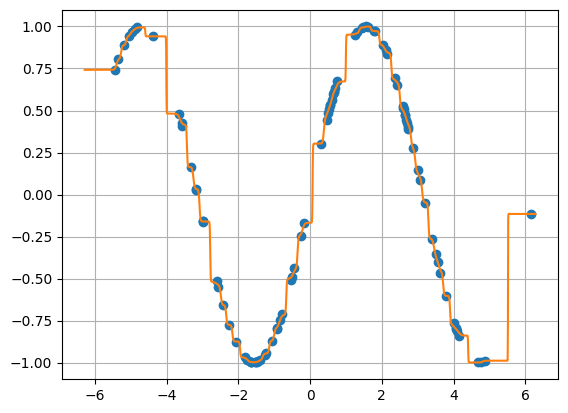

In [311]:
plt.plot(x_normal, y_normal, 'o', label = "normal data points")
plt.plot(x_interp16, kernel_interpolate(x_normal, y_normal, x_interp16, gaussian), label="fixed kernel widht, normal, gaussian")
print("fixed kernel width, normal, gaussian MSE: ", mean_square_error(x_interp16, kernel_interpolate(x_normal, y_normal, x_interp16, gaussian), f1))

plt.grid()
plt.show()

błąd dla równomiernie rozłożonych punktów jest diametralnie mniejszy. W przetwarzaniu obrazów jest to bardziej prawdopodobny scenariusz.

classic gaussian MSE:  1.5313192405299908e-05


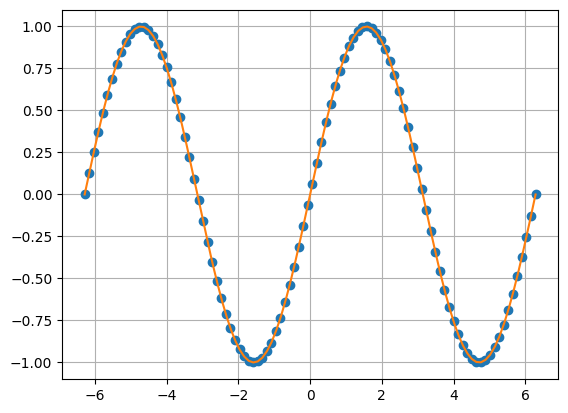

In [313]:
plt.plot(x, y, 'o', label = "data points")
plt.plot(x_interp16, kernel_interpolate_with_variable_widths(x, y, x_interp16, linear), label="classic gaussian")
print("classic gaussian MSE: ", mean_square_error(x_interp16, kernel_interpolate(x, y, x_interp16, gaussian), f1))

plt.grid()
plt.show()

Przedstawienie poszczególnych kerneli do inteprolacji.

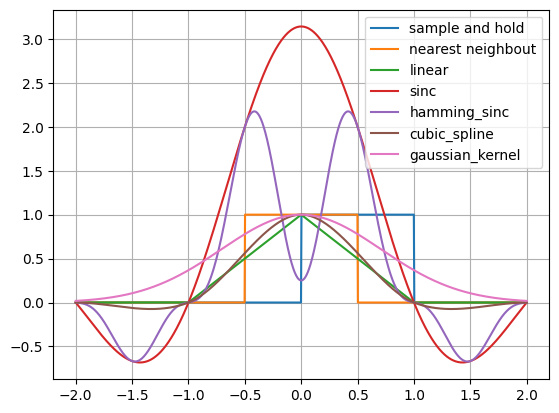

In [ ]:
x_test = np.linspace(-2, 2, 1000)
plt.plot(x_test, sample_and_hold(x_test), label="sample and hold")
plt.plot(x_test, nearest_neighbour(x_test), label="nearest neighbout")
plt.plot(x_test, linear(x_test), label="linear")
plt.plot(x_test, sinc(x_test), label="sinc")
plt.plot(x_test, hamming_sinc(x_test), label="hamming_sinc")
plt.plot(x_test, cubic_spline(x_test), label="cubic_spline")
plt.plot(x_test, gaussian(x_test), label="gaussian_kernel")
plt.grid()
plt.legend()
plt.show()

cubic_spline MSE:  0.006967867876499591


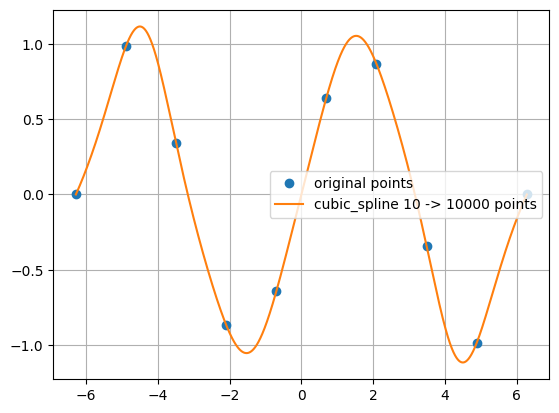

In [314]:
x_10 = np.linspace(-2 * np.pi, 2 * np.pi, 10)
plt.plot(x_10, f1(x_10), 'o', label="original points")
plt.plot(x_interp1000, kernel_interpolate(x_10, f1(x_10), x_interp1000, sinc), label="cubic_spline 10 -> 10000 points")
print("sinc MSE: ", mean_square_error(x_interp1000, kernel_interpolate(x_10, f1(x_10), x_interp1000, sinc), f1))
plt.grid()
plt.legend()
plt.show()

Wybór kernela ma większe znaczenie przy mniejsze ilości punktów wejściowych. Pomimo że funkcja f1 jest sinusoidą. To przy użyciu kernela z sinusem dokładność jest niższa.

cubic_spline MSE:  0.0037796597955849463


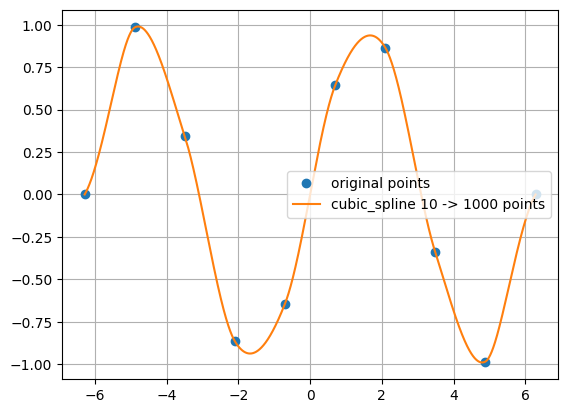

In [ ]:
x_10 = np.linspace(-2 * np.pi, 2 * np.pi, 10)
plt.plot(x_10, f1(x_10), 'o', label="original points")
plt.plot(x_interp1000, kernel_interpolate(x_10, f1(x_10), x_interp1000, cubic_spline), label="cubic_spline 10 -> 10000 points")
print("cubic_spline MSE: ", mean_square_error(x_interp1000, kernel_interpolate(x_10, f1(x_10), x_interp1000, cubic_spline), f1))
plt.grid()
plt.legend()
plt.show()

Jak możemy zauważyć dla dość gęsto rozłożonych puntków błąd nie różni się diametralnie w zależności od wybranego kernela. sytuaja przeciwna względem małej ilości punktów.

gausian mse:  1.495286384509082
cubic_spline mse :  1.5002006576202194
linear mse :  1.498596890892294


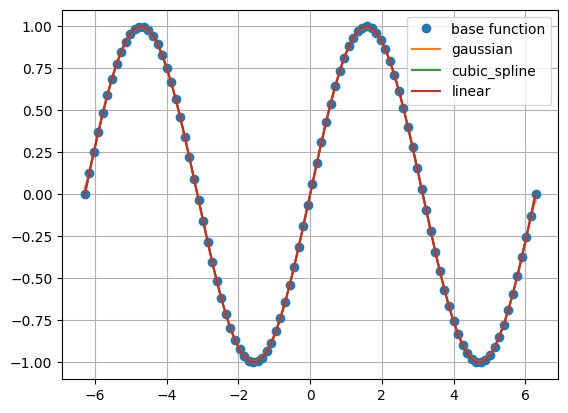

In [ ]:
plt.plot(x, f1(x), 'o', label="base function")
plt.plot(x_interp16, kernel_interpolate(x, f1(x), x_interp16, gaussian), label="gaussian")
print("gausian mse: ", mean_square_error(x_interp16, kernel_interpolate(x, f1(x), x_interp16, gaussian), f3))
plt.plot(x_interp16, kernel_interpolate(x, f1(x), x_interp16, cubic_spline), label="cubic_spline")
print("cubic_spline mse : ",  mean_square_error(x_interp16, kernel_interpolate(x, f1(x), x_interp16, cubic_spline), f3))
plt.plot(x_interp16, kernel_interpolate(x, f1(x), x_interp16, linear), label="linear")
print("linear mse : ", mean_square_error(x_interp16, kernel_interpolate(x, f1(x), x_interp16, linear), f3))
plt.legend()
plt.grid()
plt.show()

cubic_spline MSE:  0.02160375226849754
hamming_sinc MSE:  0.020142070510938557
sinc MSE:  0.0201420705109386
linear MSE:  0.02073879920815492


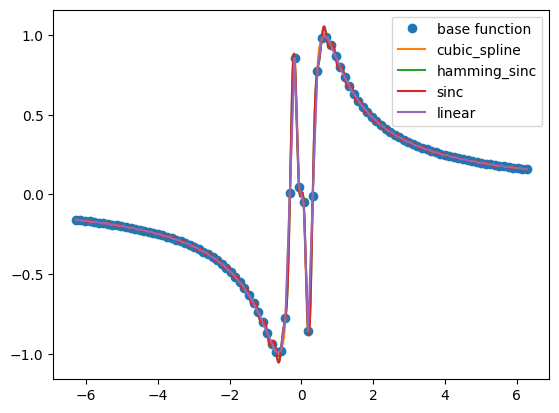

In [ ]:
plt.plot(x, f2(x), 'o', label="base function")
plt.plot(x_interp1000, kernel_interpolate(x, f2(x), x_interp1000, cubic_spline), label="cubic_spline")
print("cubic_spline MSE: ", mean_square_error(x_interp1000, kernel_interpolate(x, f2(x), x_interp1000, cubic_spline), f2))
plt.plot(x_interp1000, kernel_interpolate(x, f2(x), x_interp1000, hamming_sinc), label="hamming_sinc")
print("hamming_sinc MSE: ", mean_square_error(x_interp1000, kernel_interpolate(x, f2(x), x_interp1000, hamming_sinc), f2))
plt.plot(x_interp1000, kernel_interpolate(x, f2(x), x_interp1000, sinc), label="sinc")
print("sinc MSE: ", mean_square_error(x_interp1000, kernel_interpolate(x, f2(x), x_interp1000, sinc), f2))
plt.plot(x_interp1000, kernel_interpolate(x, f2(x), x_interp1000, linear), label="linear")
print("linear MSE: ", mean_square_error(x_interp1000, kernel_interpolate(x, f2(x), x_interp1000, linear), f2))
plt.legend()
plt.show()

sinc mse:  0.18758552708900827
cubic_spline mse :  0.20874933221322203
linear mse :  0.20197227722772282


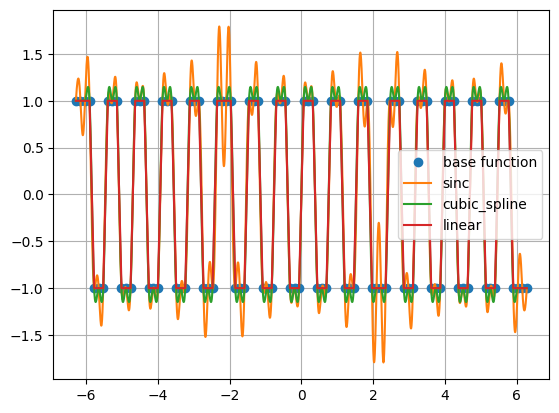

In [ ]:
plt.plot(x, f3(x), 'o', label="base function")
plt.plot(x_interp100, kernel_interpolate(x, f3(x), x_interp100, sinc), label="sinc")
print("sinc mse: ", mean_square_error(x_interp100, kernel_interpolate(x, f3(x), x_interp100, sinc), f3))
plt.plot(x_interp100, kernel_interpolate(x, f3(x), x_interp100, cubic_spline), label="cubic_spline")
print("cubic_spline mse : ",  mean_square_error(x_interp100, kernel_interpolate(x, f3(x), x_interp100, cubic_spline), f3))
plt.plot(x_interp100, kernel_interpolate(x, f3(x), x_interp100, linear), label="linear")
print("linear mse : ", mean_square_error(x_interp100, kernel_interpolate(x, f3(x), x_interp100, linear), f3))
plt.legend()
plt.grid()
plt.show()

Jak możemy zauważyć, MSE wzrasta wraz z liczbą punktów, nastomiast różnica jest niezauważalna dla coraz to wyższych wartości. Najprawdopodobniej dzieje się tak, powieniważ więcej punktów sumuje się na większy błąd.

In [ ]:
print("cubic_spline mse 2: ", 1000 * mean_square_error(x_interp2, kernel_interpolate(x, f1(x), x_interp2, cubic_spline), f1))
print("cubic_spline mse 4: ", 1000 *mean_square_error(x_interp4, kernel_interpolate(x, f1(x), x_interp4, cubic_spline), f1))
print("cubic_spline mse 10: ", 1000 *mean_square_error(x_interp10, kernel_interpolate(x, f1(x), x_interp10, cubic_spline), f1))
print("cubic_spline mse 16: ", 1000 * mean_square_error(x_interp16, kernel_interpolate(x, f1(x), x_interp16, cubic_spline), f1))
print("cubic_spline mse 1000: ", 1000 * mean_square_error(x_interp1000, kernel_interpolate(x, f1(x), x_interp1000, linear), f1))

cubic_spline mse 2:  0.001257364755002726
cubic_spline mse 4:  0.001306497402866518
cubic_spline mse 10:  0.001314577010598102
cubic_spline mse 16:  0.0013152275208112574
cubic_spline mse 1000:  0.0010808804023253304


Dokładność wielokrotnej interpolacji jest diametralnie niższa. Nawet rekompensując względem proporcji wartości maksymalnej, sytuacja pozostaje niezmienna.

1*16:  0.0013152275208112574
2*2*2*2:  7.916106679933384
(2*2*2*2) * multiplier:  2.1247112140313043


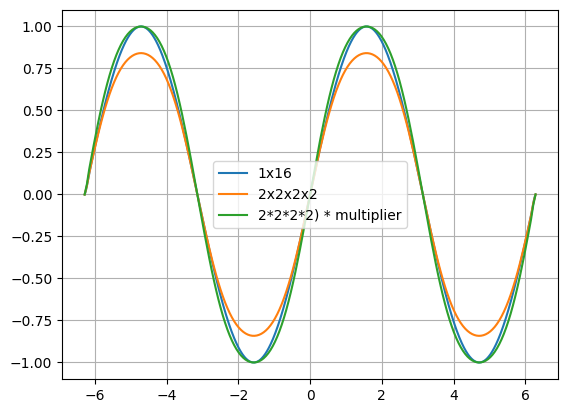

In [ ]:
fig, ax = plt.subplots()

print("1*16: ", 1000 * mean_square_error(x_interp16, kernel_interpolate(x, f1(x), x_interp16, cubic_spline), f1))
plt.plot(x_interp16, kernel_interpolate(x, f1(x), x_interp16, cubic_spline), label="1x16")

print("2*2*2*2: ", 1000 * mean_square_error(x_interp2, kernel_interpolate(x, f1(x), kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x, f1(x), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), cubic_spline), f1))
plt.plot(x_interp2, kernel_interpolate(x, f1(x), kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x, f1(x), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), cubic_spline), label="2x2x2x2")

multiplier = np.divide(1, np.max(kernel_interpolate(x, f1(x), kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x, f1(x), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), cubic_spline)))

print("(2*2*2*2) * multiplier: ", 1000 * mean_square_error(x_interp2, kernel_interpolate(x, f1(x), kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x, f1(x), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), cubic_spline) * multiplier, f1))
plt.plot(x_interp2, kernel_interpolate(x, f1(x), kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x_interp2, kernel_interpolate(x, f1(x), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), x_interp2, cubic_spline), cubic_spline) * multiplier, label="2*2*2*2) * multiplier")

plt.legend()
plt.grid()
plt.show()

In [ ]:
def convolution(data, kernel, kernel_size, step, padding = 0):
    result = []
    for i in range(0, len(data) - kernel_size, step):
        temp = []
        for j in range(0, len(data[0]) - kernel_size, step):
            if (i < (len(data)) - 1 and j < len(data[0]) - 1):
                temp.append(kernel((data[i:i+kernel_size,j:j+kernel_size]), kernel_size))
        result.append(temp)
    return np.array(result)

def graysacling(data):
    result = []
    for i in range(0, len(data)):
      temp = []
      for j in range(0, len(data[0])):
        temp.append(0.299 * data[i][j][0] + 0.587 * data[i][j][1] + 0.114 * data[i][j][2])
      result.append(temp)
    return np.array(result)

# [from, to, step]
def potato_slicing_convolution(data, times_smaller):
  return [row[::times_smaller] for row in data[::times_smaller]]

In [ ]:
def mean_kernel(data, matrix_size):
  sum = 0
  matrix = np.array([[1] * matrix_size] * matrix_size)
  for i in range(matrix_size):
    for j in range(matrix_size):
      sum += data[i][j] * matrix[i][j]
  return np.divide(sum, np.power(matrix_size, 2))

def rgb_mean_kernel(data, matrix_size):
  sum = [0] * 3
  matrix = np.array([[[1] * 3] * matrix_size] * matrix_size)
  for i in range(matrix_size):
    for j in range(matrix_size):
      for k in range(3):
        sum[k] += data[i][j][k] * matrix[i][j][k]
  sum = np.divide(sum, np.power(matrix_size, 2))
  return np.array(sum,  dtype=np.int32)

def max_pooling_kernel(data, matrix_size):
  return np.max([data[i][j] for i in range(len(data)) for j in range(len(data[0]))])

def rgb_max_pooling_kernel(data, matrix_size):
  result= [0] * 3
  r =  np.max([data[i][j][0] for i in range(len(data)) for j in range(len(data[0]))])
  g =  np.max([data[i][j][1] for i in range(len(data)) for j in range(len(data[0]))])
  b =  np.max([data[i][j][2] for i in range(len(data)) for j in range(len(data[0]))])
  result[0], result[1], result[2] = r, g, b
  return np.array(result,  dtype=np.int32)

In [ ]:
def division_reducer(data, increase_step, decrease_step, interpolation_function, convolution_function):
    print(f"photo will be reduced by {increase_step/decrease_step}")
    data = interpolate_2D(data, kernel_interpolate, increase_step, linear)
    data = convolution(data, mean_kernel, decrease_step, decrease_step)
    return data

In [ ]:
camera_grayscale = skimage.data.camera()

astronaut_color = skimage.data.astronaut()

astronaut_grayscale = graysacling(astronaut_color)

Zastosowanie sumy macierzy 10x10 o kroku 1 daje efekt rozmycia.

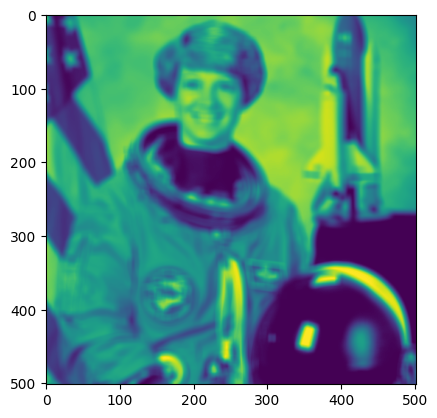

In [ ]:
plt.imshow(convolution(astronaut_grayscale, mean_kernel, 10, 1))
plt.show()

Funkcja najpierw interpoluje wartości zadane o liczbę całkowitą, następnie poprzez średnią z macierzy redukuje ją o kolejną liczbę całkowitą. Umożliwia to zmniejszanie macierzy o niecałkowitą wartość.

photo will be reduced by 0.6666666666666666


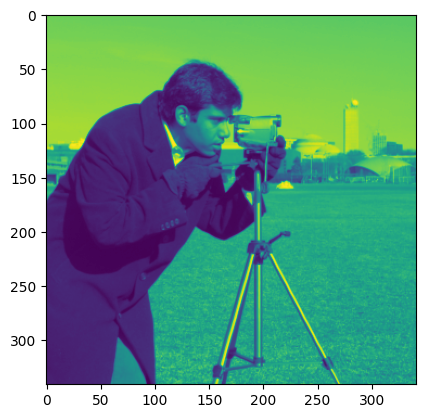

In [ ]:
plt.imshow(division_reducer(camera_grayscale, 2, 3, interpolate_2D, convolution))
plt.show()

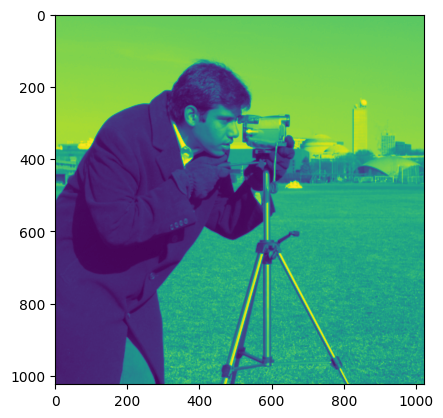

In [ ]:
camera_grayscale_interpolated_linear = interpolate_2D(camera_grayscale, kernel_interpolate, 2, linear)
camera_grayscale_interpolated_cubic_spline = interpolate_2D(camera_grayscale, kernel_interpolate, 2, cubic_spline)
plt.imshow(camera_grayscale_interpolated_linear)
plt.show()
plt.imshow(camera_grayscale_interpolated_cubic_spline)
plt.show()

Wielokrotne powtarzanie sekwencji interpolacji i zmniejszania splotem powoduje spadek jakości zdjęcia. Można zauważyć znaczne rozmycie. Potwierdzeniem jest coraz to bardziej rosnący MSE.

photo will be reduced by 1.0
MSE for 2nd loop: 21298.9415664262
photo will be reduced by 1.0
MSE for 3rd loop: 33315.624746555375
photo will be reduced by 1.0
MSE for 4th loop: 44092.67326772124


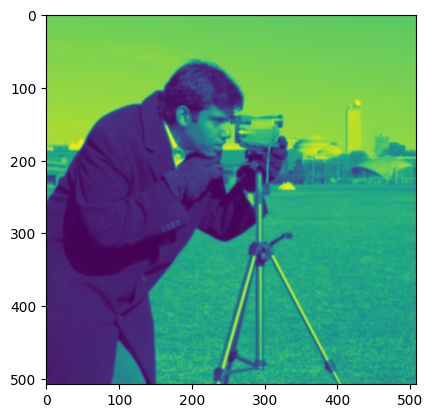

In [ ]:
original_data = camera_grayscale
tested_data1 = division_reducer(camera_grayscale, 2, 2, interpolate_2D, convolution)
print(f"MSE for 1st loop: {mean_square_error_2D(original_data, tested_data1)}")
tested_data2 = division_reducer(tested_data1, 2, 2, interpolate_2D, convolution)
print(f"MSE for 2nd loop: {mean_square_error_2D(original_data, tested_data2)}")
tested_data3 = division_reducer(tested_data2, 2, 2, interpolate_2D, convolution)
print(f"MSE for 3rd loop: {mean_square_error_2D(original_data, tested_data3)}")
tested_data4 = division_reducer(tested_data3, 2, 2, interpolate_2D, convolution)
print(f"MSE for 4th loop: {mean_square_error_2D(original_data, tested_data4)}")

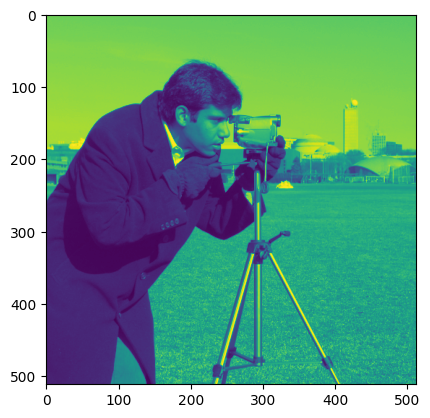

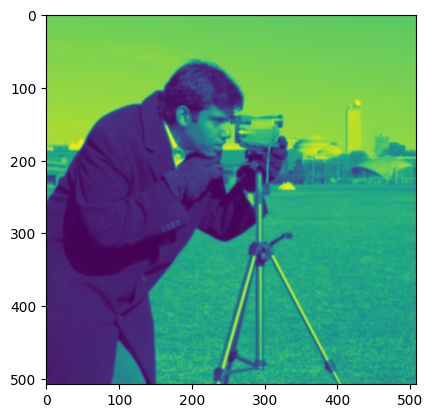

In [ ]:
plt.imshow(original_data)
plt.show()
plt.imshow(tested_data4)
plt.show()

Zmniejszanie zdjęcia w skali szarości używając 3 źródeł konwolucji. Najbardziej optymalnym jest średnia z obszaru. Max pooling faworyzował jaśniesze piksele, natomiast usuwanie rzędów pozostawiło ostre krawędzie.

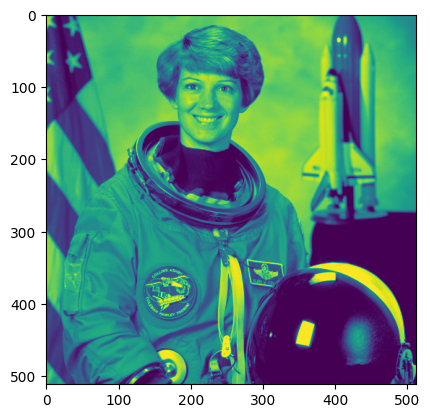

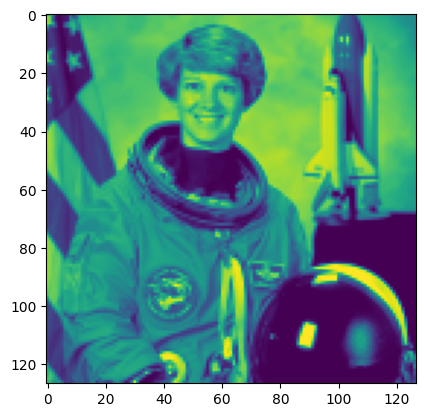

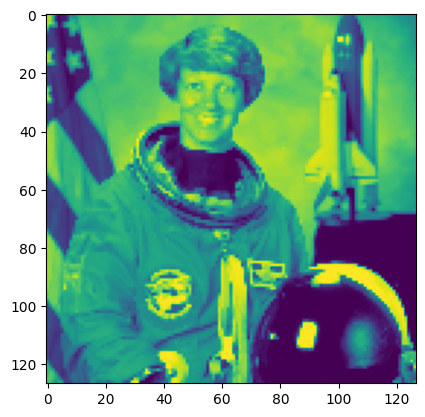

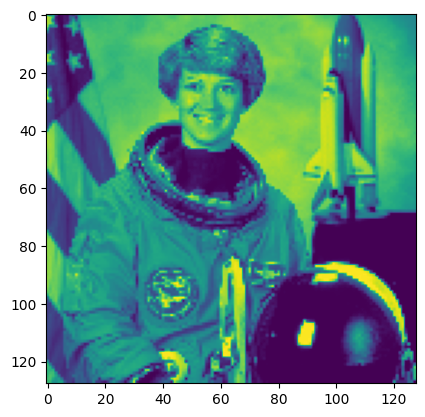

In [ ]:
plt.imshow(astronaut_grayscale)
plt.show()

# data, kernel,  kernel size, step, padding
plt.imshow(convolution(astronaut_grayscale, mean_kernel, 4, 4))
plt.show()

plt.imshow(convolution(astronaut_grayscale, max_pooling_kernel, 4, 4))
plt.show()

plt.imshow(potato_slicing_convolution(astronaut_grayscale, 4))
plt.show()

Implementacja w skali rgb.

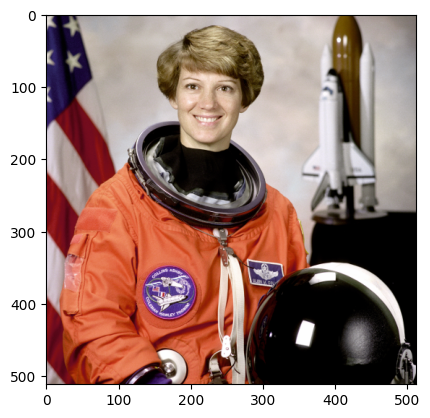

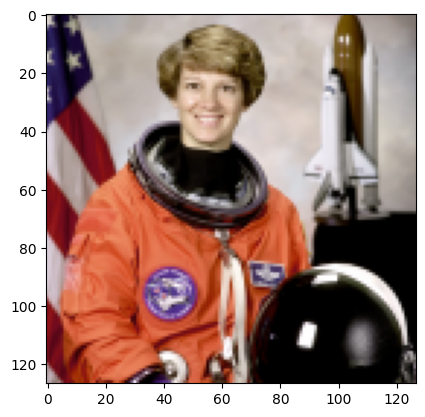

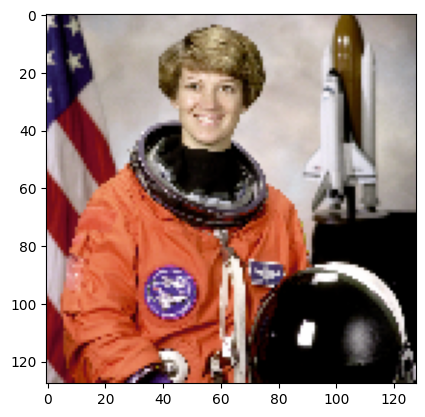

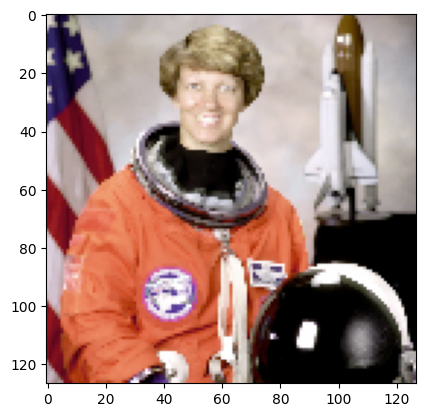

In [ ]:
plt.imshow(astronaut_color)
plt.show()

# data, kernel, kernel size, step, padding
plt.imshow(convolution(astronaut_color, rgb_mean_kernel, 4, 4, 0))
plt.show()

plt.imshow(potato_slicing_convolution(astronaut_color, 4))
plt.show()

plt.imshow(convolution(astronaut_color, rgb_max_pooling_kernel, 4, 4, 0))
plt.show()

Wnioski:
Interpolacja jest przydatnym narzędziem, bez którego nie ma problemu z dostosowywaniem zdjęcia do różniących się rozdzielczości ekranów. W zależności od oczekiwanych wartości wejścia możemy dostosować jądro interpolacji. Umożliwia nam to bardziej elastyczne, i dokładniejsze "przewidywanie" wartości.